In [2]:
!pip install tensorflow

     |████████████████████████████████| 175.3MB 67kB/s  eta 0:00:01    |███▏                            | 17.2MB 3.5MB/s eta 0:00:46     |███▉                            | 20.9MB 6.1MB/s eta 0:00:26kB/s eta 0:04:45     |█████                           | 27.7MB 524kB/s eta 0:04:42     |█████▊                          | 31.4MB 509kB/s eta 0:04:43     |███████                         | 37.9MB 2.5MB/s eta 0:00:55     |███████▋                        | 41.7MB 2.7MB/s eta 0:00:50     |████████▎                       | 45.2MB 1.7MB/s eta 0:01:17     |█████████▌                      | 51.8MB 1.2MB/s eta 0:01:48     |██████████                      | 54.5MB 842kB/s eta 0:02:24     |██████████                      | 54.7MB 842kB/s eta 0:02:24     |██████████▎                     | 56.5MB 543kB/s eta 0:03:39     |██████████▍                     | 57.2MB 371kB/s eta 0:05:18     |███████████▊                    | 64.4MB 2.5MB/s eta 0:00:46     |████████████                    | 66.2MB 2.5MB/s eta 0

In [1]:
from tensorflow import *
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
a = 6*np.ones((2,2))
b = np.where(a<7)
b

(array([0, 0, 1, 1]), array([0, 1, 0, 1]))

In [2]:
# Define tensors A1 and A23 as constants
A1 = constant([1, 2, 3, 4])
A23 = constant([[1, 2, 3], [1, 6, 4]])

# Define B1 and B23 to have the correct shape
B1 = ones_like(A1)
B23 = ones_like(A23)

# Perform element-wise multiplication
C1 = multiply(A1,B1)
C23 = multiply(A23,B23)

# Print the tensors C1 and C23
print('C1: {}'.format(C1.numpy()))
print('C23: {}'.format(C23.numpy()))

C1: [1 2 3 4]
C23: [[1 2 3]
 [1 6 4]]


In [3]:
# Define features, params, and bill as constants
features = constant([[2, 24], [2, 26], [2, 57], [1, 37]])
params = constant([[1000], [150]])
bill = constant([[3913], [2682], [8617], [64400]])

# Compute billpred using features and params
billpred = matmul(features,params)

# Compute and print the error
error = bill - billpred
print(error.numpy())

array([[-1687],
       [-3218],
       [-1933],
       [57850]], dtype=int32)


In [4]:
#Reduce_sum over various dimensions: Vertically (axis = 0)
print('Vertically (axis=0):',reduce_sum(features,0).numpy())
#Reduce_sum over various dimensions: Horizontally (axia = 1)
print('Horizontally (axis=1):',reduce_sum(features,1).numpy())

Vertically (axis=0): array([  7, 144], dtype=int32)
Horizontally (axis=1): array([26, 28, 59, 38], dtype=int32)


In [5]:
def compute_gradient(x0):
    # Define x as a variable with an initial value of x0
    x = Variable(x0)
    with GradientTape() as tape:
        tape.watch(x)
        # Define y using the multiply operation
        y = multiply(x, x)
    # Return the gradient of y with respect to x
    return tape.gradient(y, x).numpy()

# Compute and print gradients at x = -1, 1, and 0
print(compute_gradient(-1.0))
print(compute_gradient(1.0))
print(compute_gradient(0.0))

-2.0
2.0
0.0


In [6]:
#Linear Modeling
housing_data = '/Users/matthewmiller/Downloads/kc_house_data.csv'
housing = pd.read_csv(housing_data)



In [7]:
housing.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [11]:
# Use a numpy array to define price as a 32-bit float
price_log = np.log(np.array(housing['price'], np.float32))
size_log = np.log(np.array(housing['sqft_lot'],np.float32))
bedrooms = np.array(housing['bedrooms'],np.float32)

# Define waterfront as a Boolean using cast. Note that this function "casts" a tensor to a 
#new type.
waterfront = tf.cast(housing['waterfront'], tf.bool)



## Below, we initialize a model that is essentially y = mx (eg. intercept of zero). We then compute the mean absolute error on it.

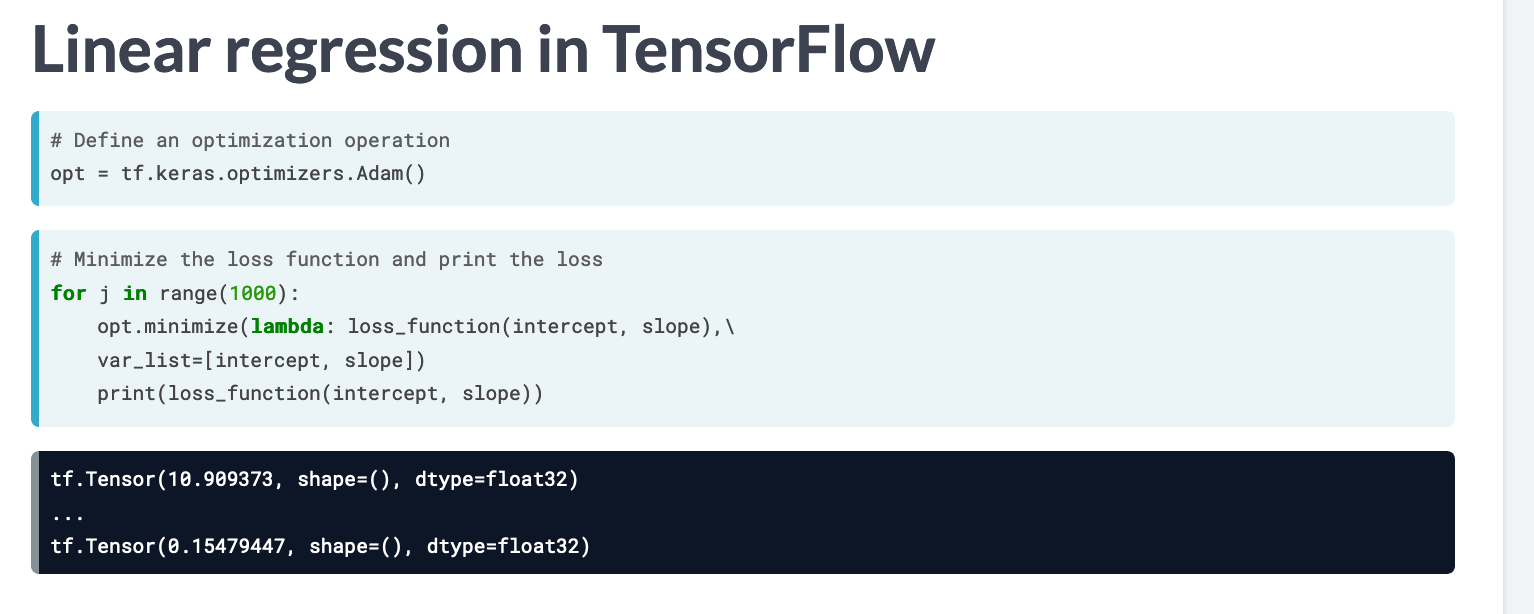
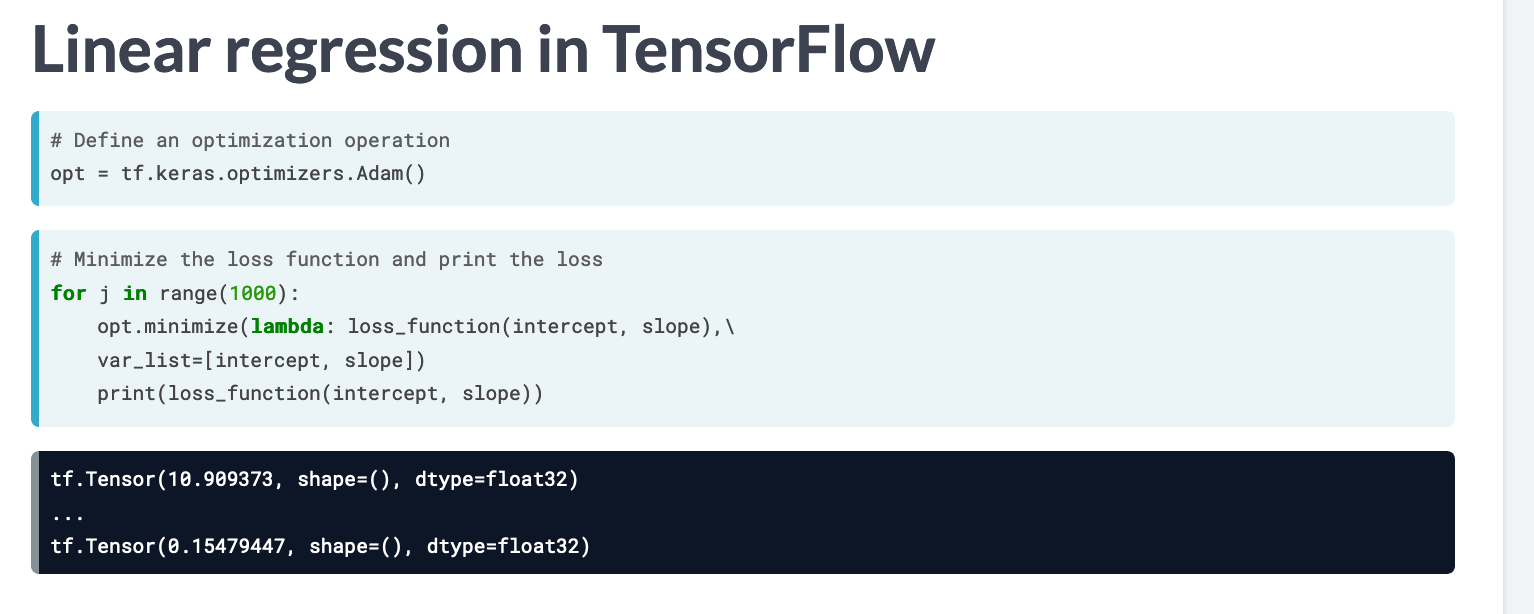

In [13]:
# Initialize a variable named scalar
scalar = Variable(1.0, float32)

# Define the model
def model(scalar, features = features):
    return scalar * features

# Define a loss function
def loss_function(scalar, features = size_log, targets = price_log):
    # Compute the predicted values
    predictions = model(scalar, features)
    
    # Return the mean absolute error loss
    return keras.losses.mae(targets, predictions)



## Single Regression Below:

In [14]:
# Initialize an adam optimizer
opt = keras.optimizers.Adam(0.5) #Adam optimizer for the loss function with LR = 0.5
intercept = Variable(1.0,float32) #initialization of intercept Variable
slope = Variable(1.0,float32) #initialization of slope variable

# Define a linear regression model
def linear_regression(intercept, slope, features = size_log):
	return intercept + slope*features

# Set loss_function() to take the variables as arguments...see logarithmic variables defined above
def loss_function(intercept, slope, features = size_log, targets = price_log):
	# Set the predicted values
	predictions = linear_regression(intercept, slope, features)
    
    # Return the mean squared error loss
	return keras.losses.mse(targets,predictions)

for j in range(100):
	# Apply minimize, pass the loss function, and supply the variables
    #Note that the var_list below contains only the trainable parameters
	opt.minimize(lambda: loss_function(intercept, slope), var_list=[intercept, slope])

	# Print every 10th value of the loss
	if j % 10 == 0:
		print(loss_function(intercept, slope).numpy())



5.665683
2.8198602
1.6216253
1.2948202
1.2590849
1.1537911
1.0407835
0.95463514
0.8745525
0.7978187


## Multiple Regression Below:

In [26]:
params = Variable([0.5,0.5,0.5],float32) #initializing the
# Define the linear regression model
def linear_regression(params, feature1 = size_log, feature2 = bedrooms):
	return params[0] + feature1*params[1] + feature2*params[2]

# Define the loss function
def loss_function(params, targets = price_log, feature1 = size_log, feature2 = bedrooms):
	# Set the predicted values
	predictions = linear_regression(params, feature1, feature2)
  
	# Use the mean absolute error loss
	return keras.losses.mae(targets, predictions)

# Define the optimize operation
opt = keras.optimizers.Adam(0.5)

# Perform minimization and print trainable variables. You pass params to var_list, as these
#are your trainable parameters.
for j in range(100):
    opt.minimize(lambda: loss_function(params), var_list=[params])
    if j%10==0:
        print("Your loss is now:",loss_function(params), "Your params are now:",params)

Your loss is now: 1.06032324 Your params are now: [0.99999845 0.999999881 0.999999523]
Your loss is now: 1.39855576 Your params are now: [1.11336744 0.930343747 0.690298736]
Your loss is now: 1.05474937 Your params are now: [1.61822104 1.12488973 0.572030067]
Your loss is now: 0.827341855 Your params are now: [2.03007221 1.11411917 0.311289877]
Your loss is now: 0.804056466 Your params are now: [2.50672865 1.07109666 0.216551274]
Your loss is now: 0.766837895 Your params are now: [3.03588152 1.0022012 0.260217607]
Your loss is now: 0.733838 Your params are now: [3.6222353 0.928482831 0.321084887]
Your loss is now: 0.69694674 Your params are now: [4.25633907 0.853120506 0.32009992]
Your loss is now: 0.660544932 Your params are now: [4.93711 0.78362 0.293403387]
Your loss is now: 0.623639762 Your params are now: [5.6475482 0.709432781 0.28112331]


## Batch Training in TensorFlow
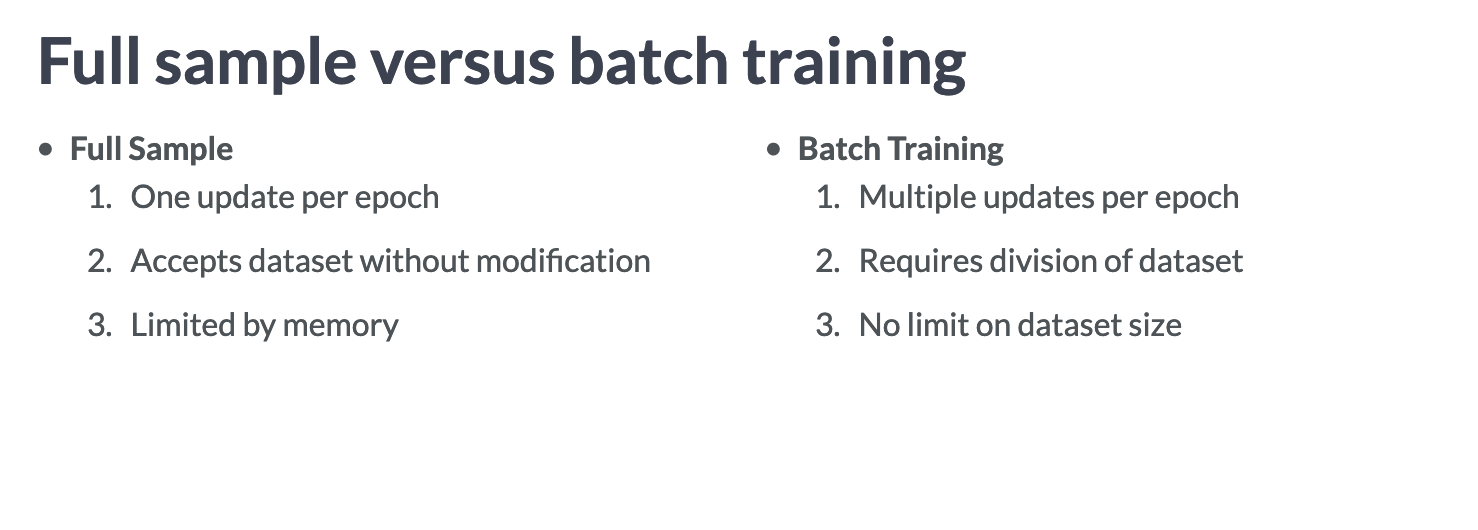
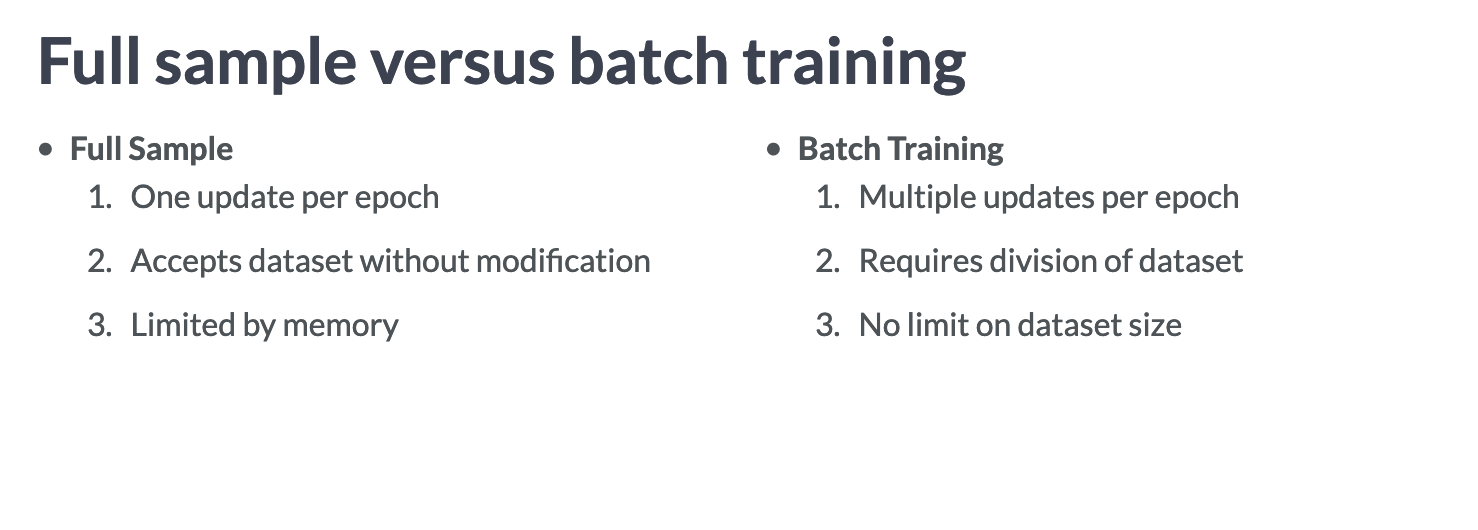

In [32]:
#You know this one works:
# Define the intercept and slope
intercept = Variable(10.0,float32)
slope = Variable(0.5, float32)

# Define the model
def linear_regression(intercept, slope, features):
	# Define the predicted values
	return intercept +slope*features

# Define the loss function
def loss_function(intercept,slope,targets,features):
	# Define the predicted values
	predictions = linear_regression(intercept, slope, features)
    
 	# Define the MSE loss
	return keras.losses.mse(targets, predictions)
# Initialize adam optimizer
opt = keras.optimizers.Adam()

# Load data in batches
for batch in pd.read_csv(housing_data, chunksize=100):
	size_batch = np.array(batch['sqft_lot'], np.float32)

	# Extract the price values for the current batch
	price_batch = np.array(batch['price'], np.float32)

	# Complete the loss, fill in the variable list, and minimize
	opt.minimize(lambda: loss_function(intercept, slope, price_batch, size_batch), var_list=[intercept, slope])

# Print trained parameters
print("Final intercept and slope",intercept.numpy(), slope.numpy())

Final intercept and slope 10.217888 0.7016


In [29]:
parameters = Variable([0.5,0.5,0.5],float32) #initializing the params

# Define the linear regression model
def linear_regression(params, feature1 = size_log, feature2 = bedrooms):
	return params[0] + feature1*params[1] + feature2*params[2]


# Define the loss function
def loss_function(params,targets,features):
	# Define the predicted values
	predictions = linear_regression(params)
    
 	# Define the MSE loss
	return keras.losses.mse(targets, predictions)

# Initialize adam optimizer
opt = keras.optimizers.Adam()

# Load data in batches
for batch in pd.read_csv(housing_data, chunksize=100):

	size_batch = np.array(batch['sqft_lot'], np.float32)
    beds_patch = np.array(batch['bedrooms'],np.float32)
    batch_int

	# Extract the price values for the current batch
	price_batch = np.array(batch['price'], np.float32)

	# Complete the loss, fill in the variable list, and minimize
	opt.minimize(lambda: loss_function(intercept, slope, price_batch, size_batch), var_list=[intercept, slope])

# Print trained parameters
print(intercept.numpy(), slope.numpy())

# Neural Net Time:

In [36]:
credit_card = '/Users/matthewmiller/Downloads/uci_credit_card.csv'
credit_df = pd.read_csv(credit_card)
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [61]:
bill_amounts = np.array(credit_df[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3']])
default= np.array(credit_df['default.payment.next.month']).reshape((-1,1))
education = np.array(credit_df['EDUCATION']).reshape((-1,1))


array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3],
       [3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [1]])

# Predicting Credit Default from Last 3 bills

In [59]:
# Construct input layer from features
inputs = constant(bill_amounts,float32)
print(inputs[0:5])

# Define first dense layer
dense1 = keras.layers.Dense(3, activation='relu')(inputs)
print(dense1.shape)

# Define second dense layer
dense2 = keras.layers.Dense(2,activation='relu')(dense1)
print(dense2.shape)

# Define output layer
outputs = keras.layers.Dense(1,activation='sigmoid')(dense2)
print(outputs.shape)

# Print error for first five examples
print(outputs.numpy().shape)
error = default-outputs.numpy()
print(error[:5])
#error = default[:5] - outputs.numpy()[:5]


[[3913 3102 689]
 [2682 1725 2682]
 [29239 14027 13559]
 [46990 48233 49291]
 [8617 5670 35835]]
TensorShape([30000, 3])
TensorShape([30000, 2])
TensorShape([30000, 1])
(30000, 1)
array([[ 0.],
       [ 0.],
       [-1.],
       [-1.],
       [-1.]])


# Multiclass Prediction: Predicting Education from Last 3 Bills

# Defining Sequential Models with Keras


In [12]:
# Define a Keras sequential model
model = keras.Sequential()

# Define the first dense layer
model.add(keras.layers.Dense(16, activation='relu', input_shape=(784,)))

# Define the second dense layer
model.add(keras.layers.Dense(8, activation='relu'))

# Define the output layer
model.add(keras.layers.Dense(4, activation='softmax'))

# Print the model architecture
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
Total params: 12,732
Trainable params: 12,732
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
# Define the first dense layer
model.add(keras.layers.Dense(16, activation='sigmoid', input_shape=(784,)))

# Apply dropout to the first layer's output
model.add(keras.layers.Dropout(0.25))

# Define the output layer
model.add(keras.layers.Dense(4, activation='softmax'))

# Compile the model
model.compile('adam', loss='categorical_crossentropy')

# Print a model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 16)                80        
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 68        
Total params: 12,880
Trainable params: 12,880
Non-trainable params: 0
____________________________________________________

In [38]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
mnist = pd.read_csv('/Users/matthewmiller/Downloads/slmnist.csv')
sign_language_features = np.array(mnist.iloc[:,1:785])
sign_language_labels = np.array(mnist.iloc[:,0]).reshape((-1,1))
sign_language_labels = enc.fit_transform(sign_language_labels).toarray()
print(sign_language_features.shape)
print(sign_language_labels.shape)


(1999, 784)
(1999, 4)


In [39]:
# Define a sequential model
model = keras.Sequential()

# Define a hidden layer
model.add(keras.layers.Dense(16, activation='relu', input_shape=(784,)))

# Define the output layer
model.add(keras.layers.Dense(4,activation='softmax'))

# Compile the model
model.compile('SGD', loss='categorical_crossentropy')

# Complete the fitting operation
model.fit(sign_language_features, sign_language_labels, epochs=5)

Epoch 1/5
63/63 [==============================] - 0s 3ms/step - loss: 516.0146
Epoch 2/5
63/63 [==============================] - 0s 3ms/step - loss: 1.3864
Epoch 3/5
63/63 [==============================] - 0s 3ms/step - loss: 1.3864
Epoch 4/5
63/63 [==============================] - 0s 3ms/step - loss: 1.3864
Epoch 5/5
63/63 [==============================] - 0s 3ms/step - loss: 1.3864


In [40]:
# Define sequential model
model = keras.Sequential()

# Define the first layer
model.add(keras.layers.Dense(1024, activation='relu', input_shape=(784,)))

# Add activation function to classifier
model.add(keras.layers.Dense(4, activation='softmax'))

# Finish the model compilation
model.compile(optimizer=keras.optimizers.Adam(lr=0.001), 
              loss='categorical_crossentropy', metrics=['accuracy'])

# Complete the model fit operation
model.fit(sign_language_features, sign_language_labels, epochs=50, validation_split=0.5)

Epoch 1/50
32/32 [==============================] - 1s 22ms/step - loss: 479.6592 - accuracy: 0.3504 - val_loss: 15.7575 - val_accuracy: 0.6380
Epoch 2/50
32/32 [==============================] - 0s 14ms/step - loss: 5.4886 - accuracy: 0.8298 - val_loss: 1.8858 - val_accuracy: 0.9220
Epoch 3/50
32/32 [==============================] - 0s 14ms/step - loss: 1.0866 - accuracy: 0.9439 - val_loss: 3.7783 - val_accuracy: 0.8560
Epoch 4/50
32/32 [==============================] - 0s 13ms/step - loss: 11.1421 - accuracy: 0.7948 - val_loss: 1.8296 - val_accuracy: 0.9380
Epoch 5/50
32/32 [==============================] - 0s 14ms/step - loss: 1.4181 - accuracy: 0.9359 - val_loss: 10.1651 - val_accuracy: 0.7630
Epoch 6/50
32/32 [==============================] - 0s 15ms/step - loss: 2.2892 - accuracy: 0.9189 - val_loss: 3.0213 - val_accuracy: 0.9100
Epoch 7/50
32/32 [==============================] - 1s 19ms/step - loss: 0.3273 - accuracy: 0.9790 - val_loss: 1.3611 - val_accuracy: 0.9650
Epoch 8/

# Cheap One-Hot Encoding with np.where():

In [6]:
# The number of image categories
n_categories = 3

# The unique values of categories in the data
categories = np.array(["shirt", "dress", "shoe"])

# Initialize ohe_labels as all zeros
ohe_labels = np.zeros((len(labels), n_categories))

# Loop over the labels
for ii in range(len(labels)):
    # Find the location of this label in the categories variable
    jj = np.where(categories == labels[ii])
    # Set the corresponding zero to one
    ohe_labels[ii, jj] = 1

NameError: name 'labels' is not defined

In [ ]:
# Calculate the number of correct predictions
number_correct = (test_labels*predictions).sum()
print(number_correct)

# Calculate the proportion of correct predictions
proportion_correct = number_correct/len(predictions)
print(proportion_correct)

## Below is essentially the complete pathway for building and fitting a neural network in Keras.

Note that prediction is using a set of labels that are **one-hot encoded**, with a shape of (# of examples, # of possible labels)

In [ ]:
# Imports components from Keras
from keras.models import Sequential
from keras.layers import Dense

# Initializes a sequential model
model = Sequential()

# First layer
model.add(Dense(10, activation='relu', input_shape=(784,)))

# Second layer
model.add(Dense(10, activation='relu'))

# Output layer
model.add(Dense(3,activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
           loss='categorical_crossentropy', 
           metrics=['accuracy'])

# Reshape the data to two-dimensional array
train_data = train_data.reshape(50, 784)

# Fit the model
model.fit(train_data, train_labels, validation_split=0.2, epochs=3)

In [ ]:
#testing the network on training data now!
# Reshape test data
test_data = test_data.reshape(10, 784)

# Evaluate the model
model.evaluate(test_data, test_labels)